In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install scikit-learn

Import data

In [2]:
df = pd.read_csv('Clean_Dataset.csv')
df


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Data Exploration

In [3]:
df.airline.value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [4]:
df.source_city.value_counts()


,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [5]:
df.destination_city.value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [6]:
df.departure_time.value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [7]:
df.arrival_time.value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


In [8]:
df.stops.value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


In [9]:
df['class'].value_counts()

,count
class,
Economy,206666
Business,93487


In [10]:
df.duration.min()

0.83

In [11]:
df.duration.max()

49.83

In [12]:
df.duration.median()

11.25

Data Preprocessing

In [13]:
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('flight', axis = 1)
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)


In [14]:
df.stops = pd.factorize(df.stops)[0]

In [15]:
df = df.join(pd.get_dummies(df['airline']).astype(int).add_prefix('airline_')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df['source_city']).astype(int).add_prefix('source_')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df['destination_city']).astype(int).add_prefix('dest_')).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df['departure_time']).astype(int).add_prefix('departure_')).drop('departure_time', axis=1)
df = df.join(pd.get_dummies(df['arrival_time']).astype(int).add_prefix('arrival_')).drop('arrival_time', axis=1)

In [16]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300151,1,1,10.00,49,81585,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Training regression model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [18]:
X, y = df.drop('price', axis=1), df.price

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
reg.score(X_test, y_test)

0.9850169761958455

In [22]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9850169761958455
MAE: 1075.4461998932586
MSE: 7723483.175502118
RMSE: 2779.115538350667


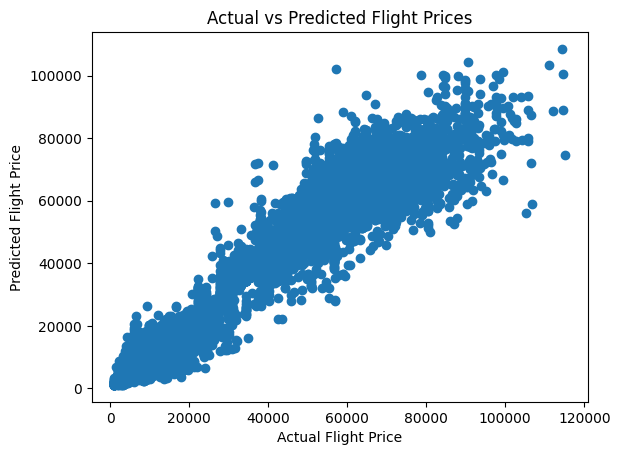

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Actual vs Predicted Flight Prices')
plt.show()

In [24]:
df.price.describe()

,price
count,300153.000000
mean,20889.660523
std,22697.767366
min,1105.000000
25%,4783.000000
50%,7425.000000
75%,42521.000000
max,123071.000000


In [25]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
sorted_importances

[('class', 0.8798035473804481),
 ('duration', 0.05779996956846925),
 ('days_left', 0.01850777022773018),
 ('airline_Vistara', 0.005060625838221194),
 ('airline_Air_India', 0.0048923194509034144),
 ('source_Delhi', 0.003550812525605579),
 ('dest_Delhi', 0.0033525542318854087),
 ('source_Mumbai', 0.0022577239486443993),
 ('stops', 0.0019152401878241268),
 ('dest_Mumbai', 0.0019063227628693103),
 ('dest_Kolkata', 0.0018418727330988883),
 ('source_Kolkata', 0.0017583507422719536),
 ('arrival_Evening', 0.0015892204383305623),
 ('dest_Hyderabad', 0.001540388266332976),
 ('dest_Bangalore', 0.0013624350324106989),
 ('source_Hyderabad', 0.0012616694458933678),
 ('arrival_Night', 0.0011657580262650446),
 ('source_Bangalore', 0.001074142582890527),
 ('departure_Evening', 0.0010630506596589536),
 ('arrival_Afternoon', 0.0009672351401146507),
 ('source_Chennai', 0.0008917508765670958),
 ('dest_Chennai', 0.000851526875797976),
 ('departure_Morning', 0.0008323646147253255),
 ('departure_Early_Morning

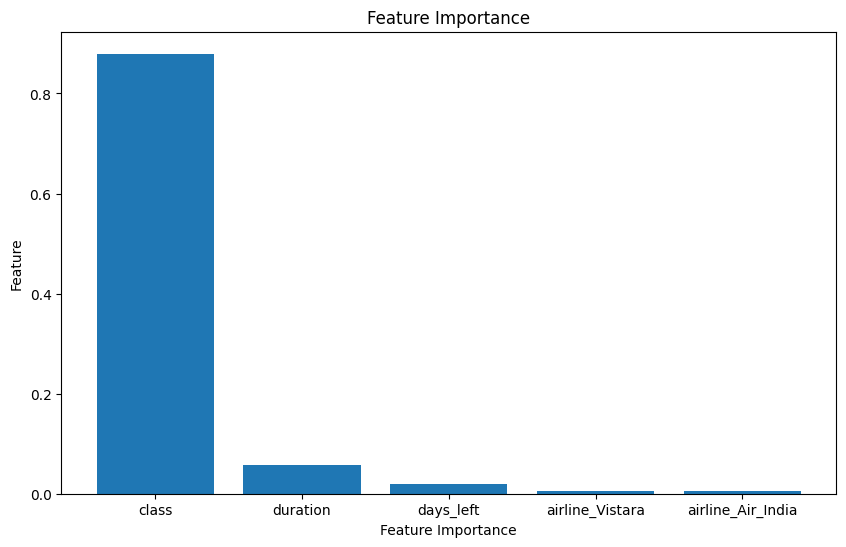

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in sorted_importances][:5], [x[1] for x in sorted_importances[:5]])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


Hyperparameter tunning

In [34]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {
   # 'n_estimators': [100, 200, 300],
    #'max_depth': [None, 10, 20, 30],
   # 'min_samples_split': [2, 5, 10],
   # 'min_samples_leaf': [ 1, 2, 4],
   # 'max_features': ['auto', 'sqrt',]
#}

#grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
#grid_search.fit(X_train, y_train)

#best_params = grid_search.best_params_
#best_params

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt']
}

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3, n_jobs=-1,scoring='neg_mean_squared_error', verbose=2, random_state=10)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_


Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_par

In [36]:
random_search.best_estimator_.score(X_test, y_test)

0.9223104803690647

In [38]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = random_search.best_estimator_.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9223104803690647
MAE: 4425.947263850003
MSE: 40047570.21182812
RMSE: 6328.314958330387


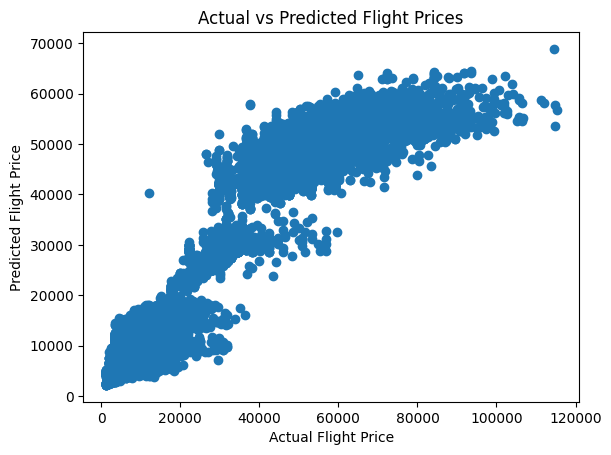

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Actual vs Predicted Flight Prices')
plt.show()